In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/208.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/473.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/333.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/45.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/369.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/56.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/89.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/20.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/275.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/212.jpg
/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
from PIL import Image
import random
import tensorflow as tf
from collections import Counter

seed = 42
random.seed(seed)               # For Python's built-in RNG
np.random.seed(seed)            # For NumPy RNG
tf.random.set_seed(seed)

2025-06-03 07:33:22.684260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748936002.918831      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748936002.987375      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# EDA

Defining path


In [3]:
DATASET_PATH = Path("/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction")

Counting the number of image files by their extensions(JPG, PNG) in the dataset folder and prints the count for each type.

In [4]:
all_images = list(DATASET_PATH.rglob("*.*"))
ext_counts = Counter(p.suffix.lower() for p in all_images if p.is_file())

# Show counts
for ext, count in ext_counts.items():
    print(f"{ext}: {count} images")

.jpg: 6307 images
.jpeg: 113 images
.png: 63 images
: 1 images


In [5]:
DEST = Path("/kaggle/working/converted-images")
DEST.mkdir(parents=True, exist_ok=True)

for img_path in DATASET_PATH.rglob("*.*"):
    if img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        try:
            # Define new path in DEST (preserving class folder)
            rel_path = img_path.relative_to(DATASET_PATH)
            new_path = DEST / rel_path.with_suffix(".jpg")
            new_path.parent.mkdir(parents=True, exist_ok=True)

            # Convert and save as .jpg
            with Image.open(img_path) as img:
                img = img.convert("RGB")
                img.save(new_path, "JPEG")
                print(f" Converted: {img_path} → {new_path}")
        except Exception as e:
            print(f" Failed: {img_path} - {e}")

 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/208.jpg → /kaggle/working/converted-images/Chimpanzee/208.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/473.jpg → /kaggle/working/converted-images/Chimpanzee/473.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/333.jpg → /kaggle/working/converted-images/Chimpanzee/333.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/45.jpg → /kaggle/working/converted-images/Chimpanzee/45.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/369.jpg → /kaggle/working/converted-images/Chimpanzee/369.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/56.jpg → /kaggle/working/converted-images/Chimpanzee/56.jpg
 Converted: /kaggle/input/danger-of-extinction-animal-im

converting all Jpeg and png images in dataset_path to jpg format and sves them in new folder converted-images.

In [6]:
# Get all .jpg images (including subfolders)
image_paths = list(DEST.rglob("*.jpg"))

# Build the DataFrame
df = pd.DataFrame({
    "JPG": [str(p) for p in image_paths],                 # full image paths as strings
    "CATEGORY": [p.parent.name for p in image_paths]      # folder name as label
})
print(df.head())
print(df.tail())

                                                 JPG    CATEGORY
0  /kaggle/working/converted-images/Arctic_Fox/15...  Arctic_Fox
1  /kaggle/working/converted-images/Arctic_Fox/34...  Arctic_Fox
2  /kaggle/working/converted-images/Arctic_Fox/30...  Arctic_Fox
3  /kaggle/working/converted-images/Arctic_Fox/48...  Arctic_Fox
4  /kaggle/working/converted-images/Arctic_Fox/80...  Arctic_Fox
                                                    JPG CATEGORY
6426  /kaggle/working/converted-images/Panda/images1...    Panda
6427  /kaggle/working/converted-images/Panda/images3...    Panda
6428  /kaggle/working/converted-images/Panda/images5...    Panda
6429  /kaggle/working/converted-images/Panda/images3...    Panda
6430  /kaggle/working/converted-images/Panda/images4...    Panda


creating a dataframe containing all jpg image file paths from converted images folder and labels each image using its parent folder name

In [7]:
print(df.columns)

Index(['JPG', 'CATEGORY'], dtype='object')


Counting how many imges belongs3 to each category 

In [8]:
print(df["CATEGORY"].value_counts())
print("Total images:", len(df))

CATEGORY
Panda               825
Lion                791
Rhino               756
cheetahs            590
Jaguars             577
Panthers            565
Amur_Leopard        530
Orangutan           496
African_Elephant    470
Chimpanzee          462
Arctic_Fox          369
Name: count, dtype: int64
Total images: 6431


Suffling Dataset randomly and reset the index afterward to decrease biase

In [9]:
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

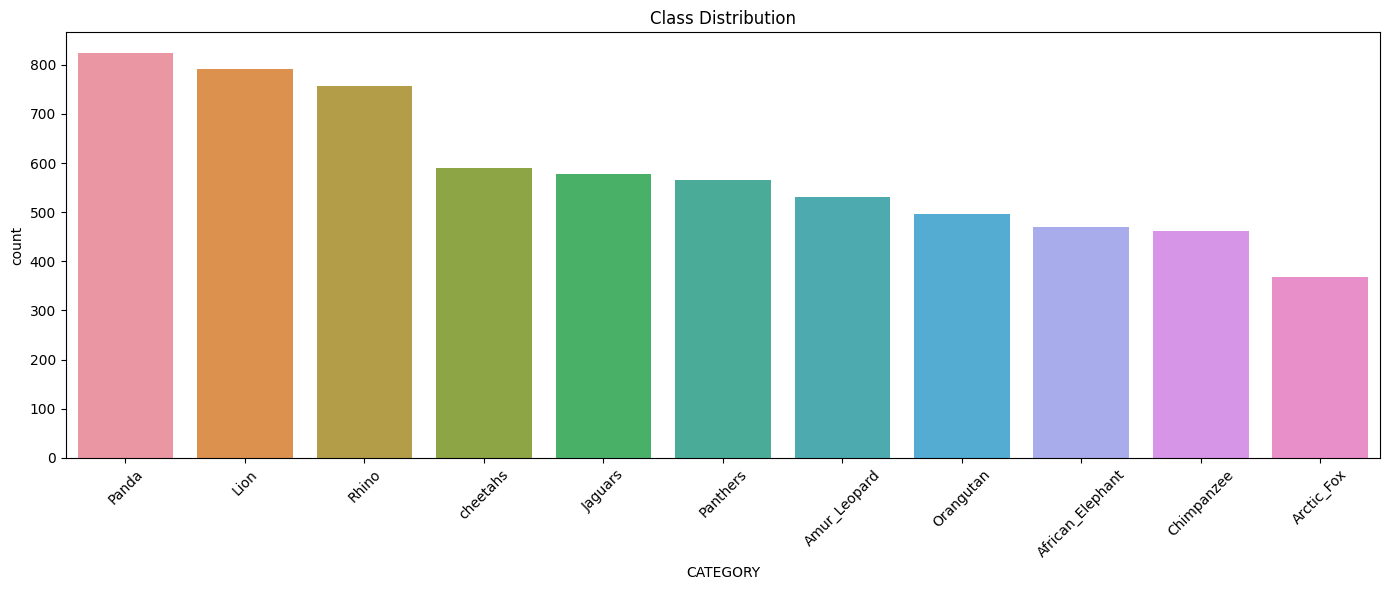

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(data = df, x='CATEGORY', order=df['CATEGORY'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

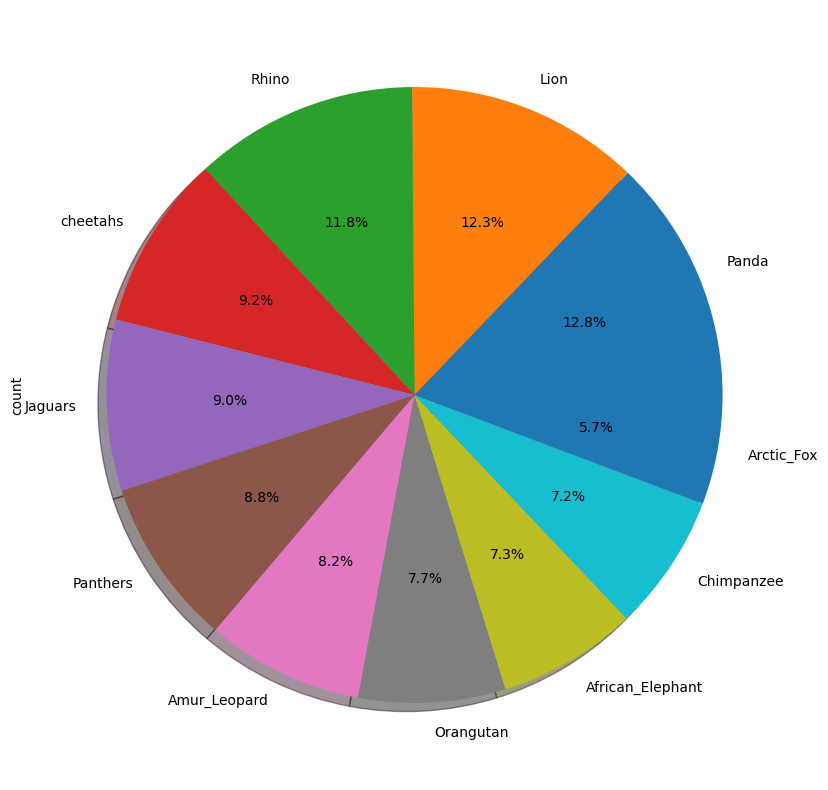

In [11]:
df["CATEGORY"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.show()

In [12]:
# Function to generate a hash from image file
def hash_file(file_path):
    with open(file_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Add hash column to the DataFrame
df["hash"] = df["JPG"].apply(hash_file)

original_count = len(df)
# Drop duplicate images based on the hash, and clean up
df = df.drop_duplicates(subset="hash").drop(columns="hash").reset_index(drop=True)
final_count = len(df)

duplicates = original_count - final_count
print("total duplicate images:", duplicates)

total duplicate images: 256


In [13]:
print(len(df))

6175


it's a great news there is no duplicate image.

In [15]:
print(df.columns)

Index(['JPG', 'CATEGORY'], dtype='object')


In [18]:
def get_image_info(path):
    try:
        with Image.open(path) as img:
            return img.size[0], img.size[1], img.mode  # width, height, mode
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return None, None, None

# Apply function to each image path
df[["Width", "Height", "Mode"]] = df["JPG"].apply(
    lambda p: pd.Series(get_image_info(p))
)

# Check the result
print(df)

                                                    JPG          CATEGORY  \
0     /kaggle/working/converted-images/Rhino/images2...             Rhino   
1     /kaggle/working/converted-images/Panda/images7...             Panda   
2     /kaggle/working/converted-images/Panda/images1...             Panda   
3     /kaggle/working/converted-images/cheetahs/imag...          cheetahs   
4     /kaggle/working/converted-images/Chimpanzee/34...        Chimpanzee   
...                                                 ...               ...   
6170  /kaggle/working/converted-images/Amur_Leopard/...      Amur_Leopard   
6171  /kaggle/working/converted-images/African_Eleph...  African_Elephant   
6172  /kaggle/working/converted-images/Orangutan/185...         Orangutan   
6173  /kaggle/working/converted-images/Orangutan/301...         Orangutan   
6174  /kaggle/working/converted-images/Orangutan/150...         Orangutan   

      Width  Height Mode  
0       100     100  RGB  
1       225     225  

In [19]:
df["Resolution"] = df["Width"] * df["Height"]
df["LABEL"] = df["CATEGORY"].astype("category").cat.codes

In [20]:
print(df.columns)

Index(['JPG', 'CATEGORY', 'Width', 'Height', 'Mode', 'Resolution', 'LABEL'], dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


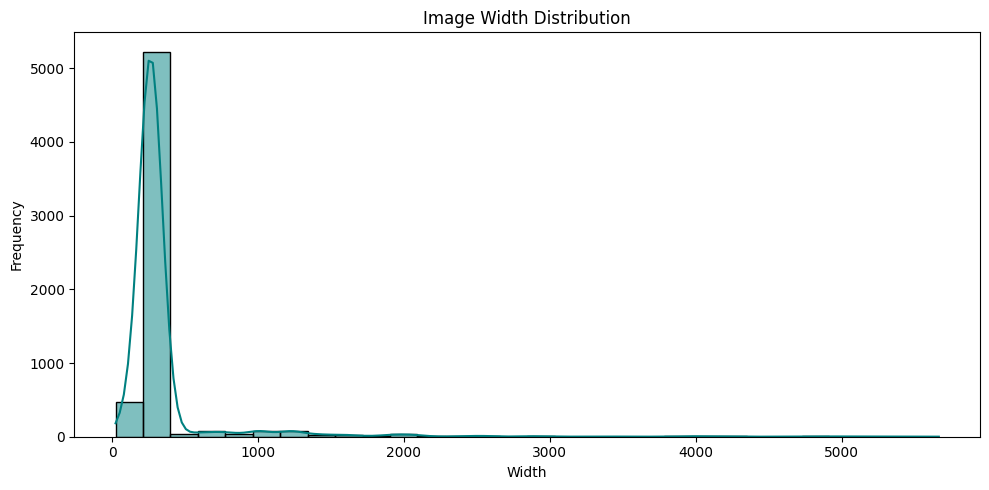

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


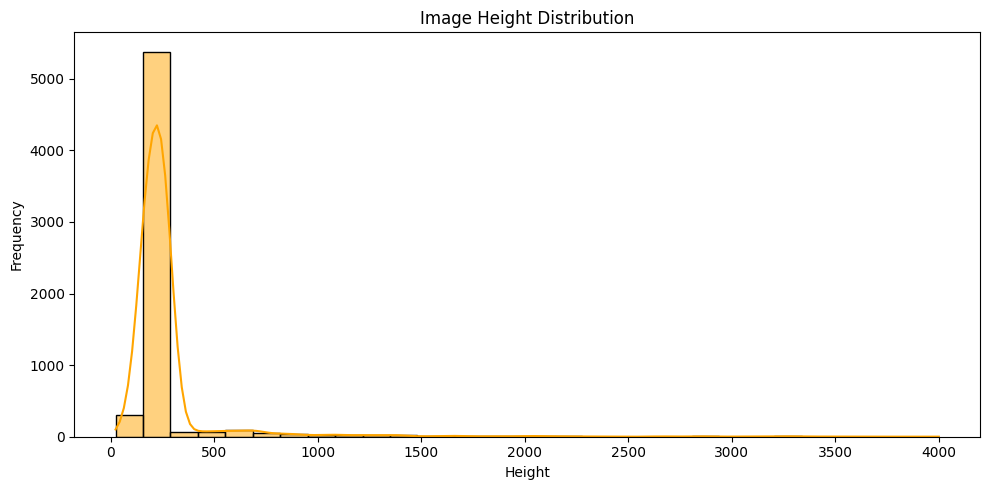

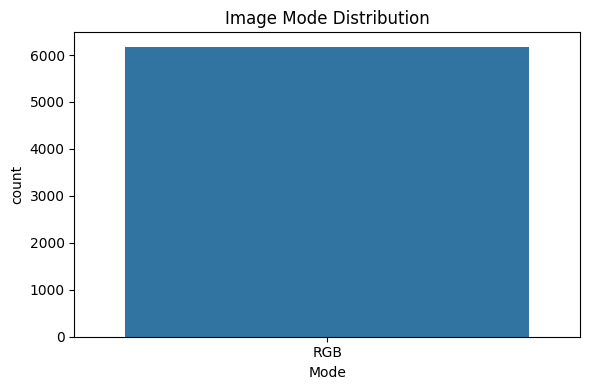

In [21]:
# === Visualize Image Size Distributions === #
plt.figure(figsize=(10, 5))
sns.histplot(df['Width'], bins=30, kde=True, color='teal')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Height'], bins=30, kde=True, color='orange')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Mode')
plt.title('Image Mode Distribution')
plt.tight_layout()
plt.show()

In [27]:
print(df.columns)

Index(['JPG', 'CATEGORY', 'Width', 'Height', 'Mode', 'Resolution', 'LABEL'], dtype='object')


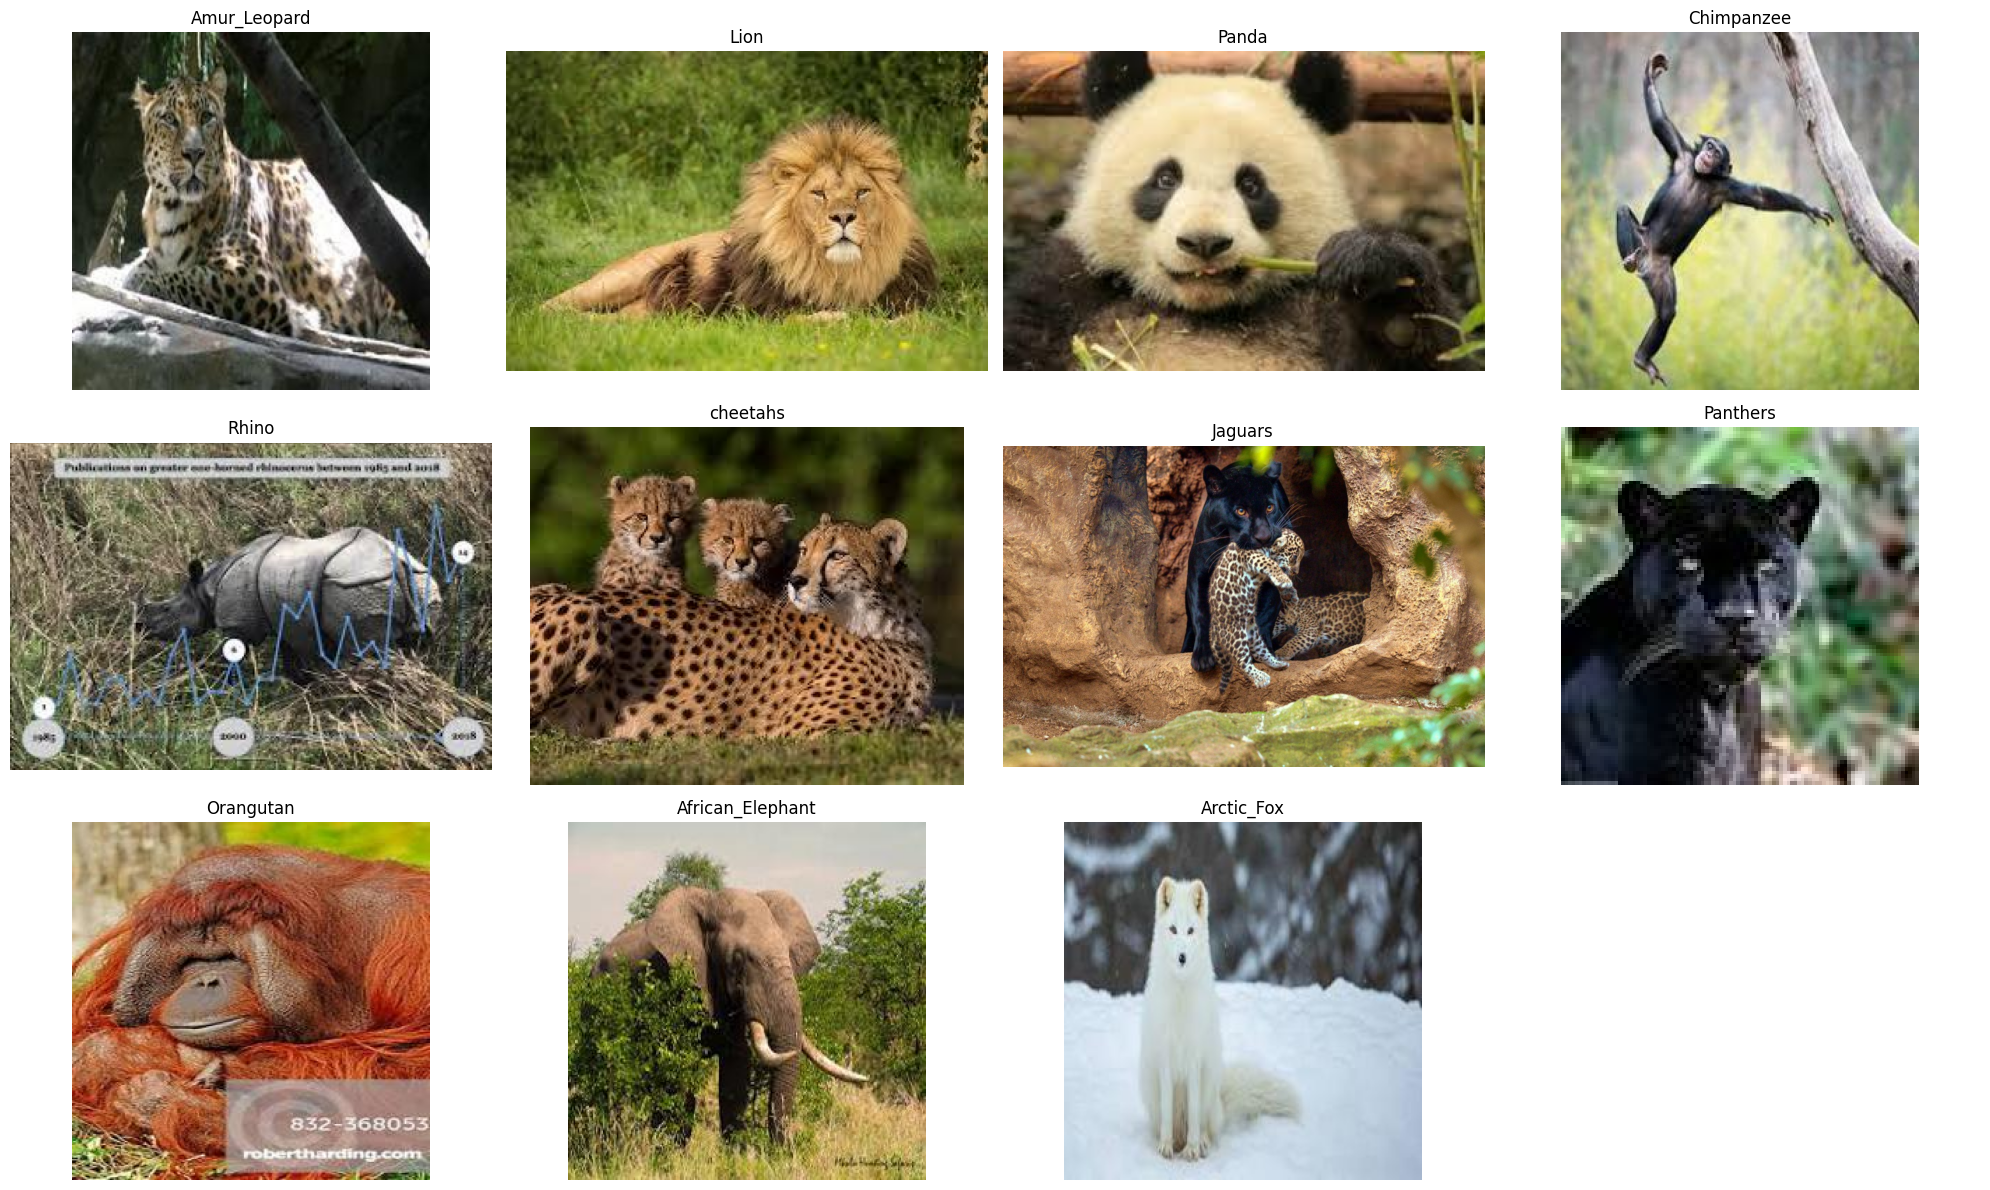

In [22]:
import cv2
import matplotlib.pyplot as plt

# Select 11 animal categories from df
animals = [
    "Amur_Leopard", "Lion", "Panda", "Chimpanzee", "Rhino",
    "cheetahs", "Jaguars", "Panthers", "Orangutan",
    "African_Elephant", "Arctic_Fox"
]

# Collect one sample image (index 80 if available) from each category
animal_list = []
labels = []

for category in animals:
    subset = df[df["CATEGORY"] == category].reset_index(drop=True)
    
    # Check if index 80 exists, otherwise take last available
    idx = 80 if len(subset) > 80 else len(subset) - 1
    
    img_path = subset.loc[idx, "JPG"]
    img = cv2.imread(img_path)
    
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        animal_list.append(img)
        labels.append(category)
    else:
        print(f"Could not load image for {category}")

# Plotting
figure, axis = plt.subplots(3, 4, figsize=(20, 12))

for i, ax in enumerate(axis.flat):
    if i < len(animal_list):
        ax.imshow(animal_list[i])
        ax.set_title(labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

In [23]:
print("Dataset folders in /kaggle/input:")
print(os.listdir("/kaggle/input"))

Dataset folders in /kaggle/input:
['danger-of-extinction-animal-image-set']


In [24]:

input_dir = "/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction"
output_dir = "/kaggle/working/resized-images"
size = (224, 224)

os.makedirs(output_dir, exist_ok=True)

for root, _, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            input_path = os.path.join(root, file)
            relative_path = os.path.relpath(input_path, input_dir)
            save_path = os.path.join(output_dir, relative_path)

            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            try:
                img = Image.open(input_path)
                img = img.convert("RGB")
                img = img.resize(size)
                img.save(save_path)
                print("Resized:", save_path)
            except:
                print("Failed to resize:", input_path)


Resized: /kaggle/working/resized-images/Chimpanzee/208.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/473.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/333.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/45.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/369.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/56.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/89.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/20.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/275.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/212.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/239.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/58.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/150.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/6.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/149.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/187.jpg
Resized: /kaggle/working/resized-images/Chimpanzee/521.jpg
Resi

In [25]:
sample_path = "/kaggle/working/resized-images/Chimpanzee/333.jpg" 

Image size: (224, 224)


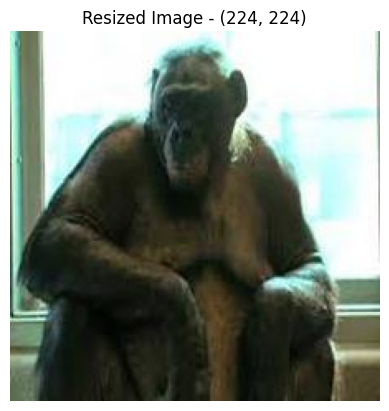

In [27]:
img = Image.open(sample_path)
print("Image size:", img.size)  

plt.imshow(img)
plt.title(f"Resized Image - {img.size}")
plt.axis('off')
plt.show()

In [28]:

# Point to resized image folder
resized_path = Path("/kaggle/working/resized-images")
data = []
for img_path in resized_path.rglob("*.jpg"):
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            resolution = width * height
            label = img_path.parent.name  # category = folder name
            data.append((str(img_path), label, width, height, resolution))
    except:
        print("Failed:", img_path)

df = pd.DataFrame(data, columns=["JPG", "CATEGORY", "Width", "Height", "Resolution"])
print("Sample rows:\n", df.head())
print("\nUnique resolutions:", df["Resolution"].unique())
print("\nImages per category:\n", df["CATEGORY"].value_counts())


Sample rows:
                                                  JPG    CATEGORY  Width  \
0  /kaggle/working/resized-images/Arctic_Fox/151.jpg  Arctic_Fox    224   
1  /kaggle/working/resized-images/Arctic_Fox/345.jpg  Arctic_Fox    224   
2  /kaggle/working/resized-images/Arctic_Fox/306.jpg  Arctic_Fox    224   
3  /kaggle/working/resized-images/Arctic_Fox/480.jpg  Arctic_Fox    224   
4   /kaggle/working/resized-images/Arctic_Fox/80.jpg  Arctic_Fox    224   

   Height  Resolution  
0     224       50176  
1     224       50176  
2     224       50176  
3     224       50176  
4     224       50176  

Unique resolutions: [50176]

Images per category:
 CATEGORY
Panda               791
Lion                754
Rhino               713
cheetahs            587
Jaguars             574
Panthers            561
Amur_Leopard        530
Orangutan           496
African_Elephant    470
Chimpanzee          462
Arctic_Fox          369
Name: count, dtype: int64


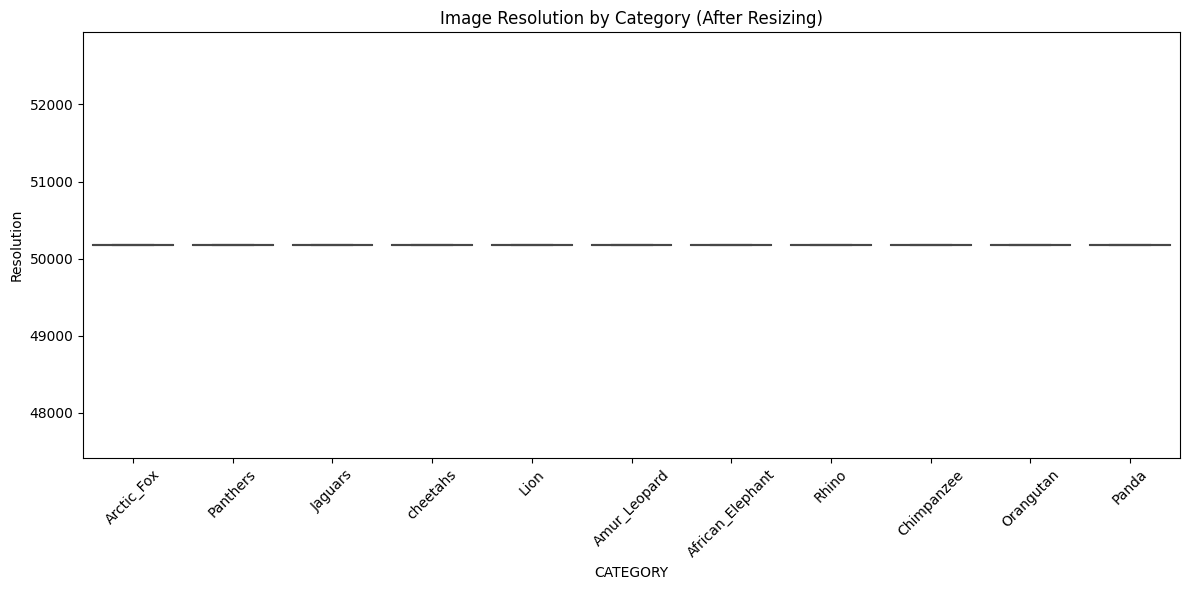

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="CATEGORY", y="Resolution")
plt.xticks(rotation=45)
plt.title("Image Resolution by Category (After Resizing)")
plt.tight_layout()
plt.show()


In [30]:
def analyze_class_imbalance(df, label_column="CATEGORY"):
    class_counts = df[label_column].value_counts()
    min_class = class_counts.min()
    max_class = class_counts.max()
    imbalance_ratio = max_class / min_class
    
    print("\n Class Imbalance Analysis:")
    for cls, count in class_counts.items():
        percentage = 100 * count / len(df)
        print(f"{cls}: {count} images ({percentage:.1f}%)")
    return class_counts, imbalance_ratio
    
# Analyze class imbalance
class_counts, imbalance_ratio = analyze_class_imbalance(df)



 Class Imbalance Analysis:
Panda: 791 images (12.5%)
Lion: 754 images (12.0%)
Rhino: 713 images (11.3%)
cheetahs: 587 images (9.3%)
Jaguars: 574 images (9.1%)
Panthers: 561 images (8.9%)
Amur_Leopard: 530 images (8.4%)
Orangutan: 496 images (7.9%)
African_Elephant: 470 images (7.5%)
Chimpanzee: 462 images (7.3%)
Arctic_Fox: 369 images (5.9%)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications import EfficientNetB0, VGG16, ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import efficientnet, vgg16, resnet_v2

# Encode labels
label_encoder = LabelEncoder()
df["LABEL"] = label_encoder.fit_transform(df["CATEGORY"])

print(f"Total dataset size: {len(df)}")
train_df, test_df = train_test_split(df, test_size=0.15, stratify=df['LABEL'], random_state=42)
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")


Total dataset size: 6307
Training set size: 5360
Test set size: 947


In [32]:
#  Compute class weights from training set
classes = sorted(train_df["LABEL"].unique())
class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.array(classes),
    y=train_df["LABEL"]
)
class_weights = dict(zip(classes, class_weights_array))
print("Class Weights:", class_weights)

Class Weights: {0: 1.2212349054454317, 1: 1.082828282828283, 2: 1.5518239722061378, 3: 1.239879713162156, 4: 0.9985096870342772, 5: 0.7601758615799178, 6: 1.1574174044482832, 7: 0.7251082251082251, 8: 1.0215361158757386, 9: 0.804080408040804, 10: 0.9764984514483512}


In [33]:
print(train_df.columns)

Index(['JPG', 'CATEGORY', 'Width', 'Height', 'Resolution', 'LABEL'], dtype='object')


In [34]:
# === Model Builders ===
def build_resnet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = resnet_v2.preprocess_input(input_layer)
    base = ResNet50V2(include_top=False, weights="imagenet", input_tensor=x)
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)
    return Model(inputs=input_layer, outputs=output, name="ResNet50V2")

def build_vgg(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = vgg16.preprocess_input(input_layer)
    base = VGG16(include_top=False, weights="imagenet", input_tensor=x)
    for layer in base.layers[:10]:
        layer.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)
    return Model(inputs=input_layer, outputs=output, name="VGG16")

def build_effnet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = efficientnet.preprocess_input(input_layer)
    base = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=x)
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)
    return Model(inputs=input_layer, outputs=output, name="EfficientNetB0")

In [35]:

def train_model_with_kfold(model_fn, train_df, input_shape=(224, 224, 3), batch_size=32, epochs=20, save_path=None):
    # Map model to its preprocessing function
    preprocess_map = {
        "EfficientNetB0": efficientnet.preprocess_input,
        "ResNet50V2": resnet_v2.preprocess_input,
        "VGG16": vgg16.preprocess_input
    }
    model_name = model_fn.__name__
    preprocess_fn = preprocess_map.get(model_name)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(train_df["JPG"], train_df["LABEL"])):
        print(f"\n🔁 Fold {fold + 1} - {model_name}")

        fold_train = train_df.iloc[train_idx].reset_index(drop=True)
        fold_val = train_df.iloc[val_idx].reset_index(drop=True)

        # Compute class weights
        class_weights_array = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(fold_train["LABEL"]),
            y=fold_train["LABEL"]
        )
        class_weights = dict(zip(np.unique(fold_train["LABEL"]), class_weights_array))

        # Data generators
        train_datagen = ImageDataGenerator(
            preprocessing_function=preprocess_fn,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            horizontal_flip=True
        )
        val_datagen = ImageDataGenerator(preprocessing_function=preprocess_fn)

        train_flow = train_datagen.flow_from_dataframe(
            dataframe=fold_train,
            x_col="JPG",
            y_col="CATEGORY",
            target_size=input_shape[:2],
            batch_size=batch_size,
            class_mode="categorical",
            shuffle=True
        )
        val_flow = val_datagen.flow_from_dataframe(
            dataframe=fold_val,
            x_col="JPG",
            y_col="CATEGORY",
            target_size=input_shape[:2],
            batch_size=batch_size,
            class_mode="categorical",
            shuffle=False
        )

        # Build model
        input_layer = Input(shape=input_shape)
        base_model = model_fn(include_top=False, weights="imagenet", input_tensor=input_layer)
        base_model.trainable = False
        x = GlobalAveragePooling2D()(base_model.output)
        x = Dropout(0.3)(x)
        output = Dense(fold_train["CATEGORY"].nunique(), activation="softmax")(x)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

        # Callbacks (including saving best model per fold)
        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ReduceLROnPlateau(patience=3, factor=0.5)
        ]
        if save_path:
            callbacks.append(
                ModelCheckpoint(f"{save_path}_fold{fold+1}.keras", save_best_only=True)
            )

        # Train model
        history = model.fit(
            train_flow,
            validation_data=val_flow,
            epochs=epochs,
            class_weight=class_weights,
            callbacks=callbacks
        )

        histories.append(history)
        loss, acc = model.evaluate(val_flow, verbose=0)
        accuracies.append(acc)
        print(f"Fold {fold + 1} Accuracy: {acc:.4f}")

    # Summary
    print("\n Cross-Validation Accuracies:")
    for i, acc in enumerate(accuracies):
        print(f"  Fold {i + 1}: {acc:.4f}")
    print(f" Average Accuracy: {np.mean(accuracies):.4f}")
    
    return accuracies, histories


In [36]:
# VGG16
acc_vgg, hist_vgg = train_model_with_kfold(
    VGG16, 
    train_df, 
    save_path="/kaggle/working/vgg16"
)


🔁 Fold 1 - VGG16
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


I0000 00:00:1748936710.509897      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1748936717.602779     115 service.cc:148] XLA service 0x7f536400c4e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748936717.605298     115 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748936718.017877     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/134 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.0859 - loss: 13.9409 

I0000 00:00:1748936726.910815     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/134 ━━━━━━━━━━━━━━━━━━━━ 61s 376ms/step - accuracy: 0.0796 - loss: 12.4365 - val_accuracy: 0.1679 - val_loss: 7.2468 - learning_rate: 1.0000e-04
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.1577 - loss: 8.1967 - val_accuracy: 0.2966 - val_loss: 4.5912 - learning_rate: 1.0000e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.2512 - loss: 6.0020 - val_accuracy: 0.4328 - val_loss: 3.0921 - learning_rate: 1.0000e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.3306 - loss: 4.7776 - val_accuracy: 0.5317 - val_loss: 2.2792 - learning_rate: 1.0000e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.3753 - loss: 4.3231 - val_accuracy: 0.6073 - val_loss: 1.7725 - learning_rate: 1.0000e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.4389 - loss: 3.5122 - val_accuracy: 0.6679 - val_loss: 1.4330 - learning_rate: 1.0000e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 49s 348ms/step - accuracy: 0.1281 - loss: 10.0200 - val_accuracy: 0.2295 - val_loss: 5.6062 - learning_rate: 1.0000e-04
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.2122 - loss: 7.0798 - val_accuracy: 0.3806 - val_loss: 3.4065 - learning_rate: 1.0000e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 342ms/step - accuracy: 0.3140 - loss: 5.1371 - val_accuracy: 0.5233 - val_loss: 2.3445 - learning_rate: 1.0000e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 347ms/step - accuracy: 0.4132 - loss: 3.9430 - val_accuracy: 0.6129 - val_loss: 1.8669 - learning_rate: 1.0000e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.4656 - loss: 3.5521 - val_accuracy: 0.6763 - val_loss: 1.4926 - learning_rate: 1.0000e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 342ms/step - accuracy: 0.5276 - loss: 2.9900 - val_accuracy: 0.7127 - val_loss: 1.3544 - learning_rate: 1.0000e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 3

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 49s 349ms/step - accuracy: 0.0622 - loss: 12.2254 - val_accuracy: 0.1558 - val_loss: 7.0275 - learning_rate: 1.0000e-04
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.1776 - loss: 8.0447 - val_accuracy: 0.2957 - val_loss: 4.4102 - learning_rate: 1.0000e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 342ms/step - accuracy: 0.2601 - loss: 6.0899 - val_accuracy: 0.4646 - val_loss: 2.8955 - learning_rate: 1.0000e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.3540 - loss: 4.7984 - val_accuracy: 0.5634 - val_loss: 2.1368 - learning_rate: 1.0000e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.4282 - loss: 3.8337 - val_accuracy: 0.6381 - val_loss: 1.7086 - learning_rate: 1.0000e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.4760 - loss: 3.3237 - val_accuracy: 0.6884 - val_loss: 1.4444 - learning_rate: 1.0000e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 3

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 50s 351ms/step - accuracy: 0.1034 - loss: 11.5138 - val_accuracy: 0.2183 - val_loss: 6.2568 - learning_rate: 1.0000e-04
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.1994 - loss: 7.5903 - val_accuracy: 0.3685 - val_loss: 3.9726 - learning_rate: 1.0000e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 346ms/step - accuracy: 0.2803 - loss: 5.9238 - val_accuracy: 0.4981 - val_loss: 2.6583 - learning_rate: 1.0000e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 48s 357ms/step - accuracy: 0.3663 - loss: 4.5565 - val_accuracy: 0.5830 - val_loss: 2.0178 - learning_rate: 1.0000e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.4325 - loss: 3.8306 - val_accuracy: 0.6549 - val_loss: 1.5981 - learning_rate: 1.0000e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.4794 - loss: 3.3170 - val_accuracy: 0.6996 - val_loss: 1.3617 - learning_rate: 1.0000e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 3

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 50s 352ms/step - accuracy: 0.1036 - loss: 11.5357 - val_accuracy: 0.1987 - val_loss: 6.8608 - learning_rate: 1.0000e-04
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 351ms/step - accuracy: 0.1707 - loss: 8.0874 - val_accuracy: 0.3181 - val_loss: 4.5481 - learning_rate: 1.0000e-04
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.2610 - loss: 6.2676 - val_accuracy: 0.4552 - val_loss: 3.1700 - learning_rate: 1.0000e-04
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 351ms/step - accuracy: 0.3351 - loss: 5.0048 - val_accuracy: 0.5504 - val_loss: 2.3361 - learning_rate: 1.0000e-04
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.3972 - loss: 4.2048 - val_accuracy: 0.6213 - val_loss: 1.8168 - learning_rate: 1.0000e-04
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.4619 - loss: 3.3362 - val_accuracy: 0.6735 - val_loss: 1.4973 - learning_rate: 1.0000e-04
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 3

In [37]:
# EfficientNetB0
acc_effnet, hist_effnet = train_model_with_kfold(
    EfficientNetB0, 
    train_df,
    epochs=10,
    save_path="/kaggle/working/efficientnet"
)


🔁 Fold 1 - EfficientNetB0
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 84s 430ms/step - accuracy: 0.1817 - loss: 2.3268 - val_accuracy: 0.7034 - val_loss: 1.6223 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 352ms/step - accuracy: 0.6517 - loss: 1.5075 - val_accuracy: 0.8685 - val_loss: 1.0574 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 334ms/step - accuracy: 0.7973 - loss: 1.0507 - val_accuracy: 0.9086 - val_loss: 0.7532 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 331ms/step - accuracy: 0.8571 - loss: 0.7852 - val_accuracy: 0.9226 - val_loss: 0.5855 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.8717 - loss: 0.6391 - val_accuracy: 0.9310 - val_loss: 0.4840 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.8885 - loss: 0.5365 - val_accuracy: 0.9319 - val_loss: 0.4179 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 33

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.2197 - loss: 2.2428 - val_accuracy: 0.7332 - val_loss: 1.5439 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 337ms/step - accuracy: 0.6892 - loss: 1.4409 - val_accuracy: 0.8554 - val_loss: 1.0285 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 333ms/step - accuracy: 0.8233 - loss: 0.9939 - val_accuracy: 0.8881 - val_loss: 0.7498 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 337ms/step - accuracy: 0.8451 - loss: 0.7568 - val_accuracy: 0.9058 - val_loss: 0.5929 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.8738 - loss: 0.6161 - val_accuracy: 0.9179 - val_loss: 0.4954 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.8968 - loss: 0.5252 - val_accuracy: 0.9188 - val_loss: 0.4308 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 32

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 77s 401ms/step - accuracy: 0.1461 - loss: 2.4038 - val_accuracy: 0.6166 - val_loss: 1.6883 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.5960 - loss: 1.5710 - val_accuracy: 0.8209 - val_loss: 1.1156 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.7923 - loss: 1.0762 - val_accuracy: 0.9021 - val_loss: 0.7988 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 337ms/step - accuracy: 0.8547 - loss: 0.7978 - val_accuracy: 0.9179 - val_loss: 0.6190 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.8779 - loss: 0.6468 - val_accuracy: 0.9244 - val_loss: 0.5088 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 334ms/step - accuracy: 0.8923 - loss: 0.5510 - val_accuracy: 0.9310 - val_loss: 0.4357 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 33

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 77s 403ms/step - accuracy: 0.2230 - loss: 2.2919 - val_accuracy: 0.7118 - val_loss: 1.5797 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.6785 - loss: 1.4651 - val_accuracy: 0.8507 - val_loss: 1.0569 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 321ms/step - accuracy: 0.8137 - loss: 1.0074 - val_accuracy: 0.8853 - val_loss: 0.7761 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 322ms/step - accuracy: 0.8585 - loss: 0.7495 - val_accuracy: 0.9049 - val_loss: 0.6172 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.8917 - loss: 0.6050 - val_accuracy: 0.9132 - val_loss: 0.5186 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.8907 - loss: 0.5196 - val_accuracy: 0.9198 - val_loss: 0.4535 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 32

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 77s 400ms/step - accuracy: 0.2173 - loss: 2.2147 - val_accuracy: 0.7397 - val_loss: 1.5285 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 331ms/step - accuracy: 0.6918 - loss: 1.4215 - val_accuracy: 0.8582 - val_loss: 1.0063 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.8105 - loss: 0.9813 - val_accuracy: 0.8993 - val_loss: 0.7277 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.8535 - loss: 0.7453 - val_accuracy: 0.9132 - val_loss: 0.5723 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.8816 - loss: 0.6039 - val_accuracy: 0.9216 - val_loss: 0.4765 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 331ms/step - accuracy: 0.8854 - loss: 0.5284 - val_accuracy: 0.9291 - val_loss: 0.4128 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 44s 33

In [38]:
# ResNet50V2
acc_resnet, hist_resnet = train_model_with_kfold(
    ResNet50V2,
    train_df, 
    epochs=10,
    save_path="/kaggle/working/resnet"
)



🔁 Fold 1 - ResNet50V2
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.1628 - loss: 2.8234 - val_accuracy: 0.6688 - val_loss: 1.1639 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 346ms/step - accuracy: 0.5786 - loss: 1.3000 - val_accuracy: 0.8507 - val_loss: 0.6233 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.7584 - loss: 0.7983 - val_accuracy: 0.8871 - val_loss: 0.4456 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 347ms/step - accuracy: 0.8172 - loss: 0.6115 - val_accuracy: 0.9086 - val_loss: 0.3600 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.8340 - loss: 0.5382 - val_accuracy: 0.9142 - val_loss: 0.3120 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.8712 - loss: 0.4454 - val_accuracy: 0.9254 - val_loss: 0.2830 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 34

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.1731 - loss: 2.7695 - val_accuracy: 0.6063 - val_loss: 1.2430 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.5767 - loss: 1.2717 - val_accuracy: 0.8069 - val_loss: 0.6988 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 337ms/step - accuracy: 0.7401 - loss: 0.8130 - val_accuracy: 0.8685 - val_loss: 0.5069 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.8003 - loss: 0.6337 - val_accuracy: 0.8899 - val_loss: 0.4143 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.8507 - loss: 0.4876 - val_accuracy: 0.9104 - val_loss: 0.3610 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.8616 - loss: 0.4482 - val_accuracy: 0.9179 - val_loss: 0.3285 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 34

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.2104 - loss: 2.4787 - val_accuracy: 0.7304 - val_loss: 1.0579 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 342ms/step - accuracy: 0.6415 - loss: 1.1330 - val_accuracy: 0.8517 - val_loss: 0.6170 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.7710 - loss: 0.7447 - val_accuracy: 0.8899 - val_loss: 0.4542 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.8308 - loss: 0.5653 - val_accuracy: 0.9039 - val_loss: 0.3754 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 336ms/step - accuracy: 0.8487 - loss: 0.4863 - val_accuracy: 0.9132 - val_loss: 0.3308 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.8726 - loss: 0.4264 - val_accuracy: 0.9179 - val_loss: 0.3018 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 34

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.2094 - loss: 2.5467 - val_accuracy: 0.6437 - val_loss: 1.1531 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.6135 - loss: 1.1643 - val_accuracy: 0.8237 - val_loss: 0.6684 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.7390 - loss: 0.7889 - val_accuracy: 0.8675 - val_loss: 0.4955 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.8096 - loss: 0.5887 - val_accuracy: 0.8853 - val_loss: 0.4107 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.8325 - loss: 0.5103 - val_accuracy: 0.8955 - val_loss: 0.3594 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 347ms/step - accuracy: 0.8566 - loss: 0.4284 - val_accuracy: 0.9095 - val_loss: 0.3272 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 35

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.2061 - loss: 2.6420 - val_accuracy: 0.6604 - val_loss: 1.1456 - learning_rate: 1.0000e-04
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.5889 - loss: 1.2411 - val_accuracy: 0.8293 - val_loss: 0.6634 - learning_rate: 1.0000e-04
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.7401 - loss: 0.8129 - val_accuracy: 0.8703 - val_loss: 0.4786 - learning_rate: 1.0000e-04
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 339ms/step - accuracy: 0.8118 - loss: 0.6212 - val_accuracy: 0.8946 - val_loss: 0.3927 - learning_rate: 1.0000e-04
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.8411 - loss: 0.5093 - val_accuracy: 0.9021 - val_loss: 0.3424 - learning_rate: 1.0000e-04
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step - accuracy: 0.8525 - loss: 0.4500 - val_accuracy: 0.9132 - val_loss: 0.3135 - learning_rate: 1.0000e-04
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 46s 34

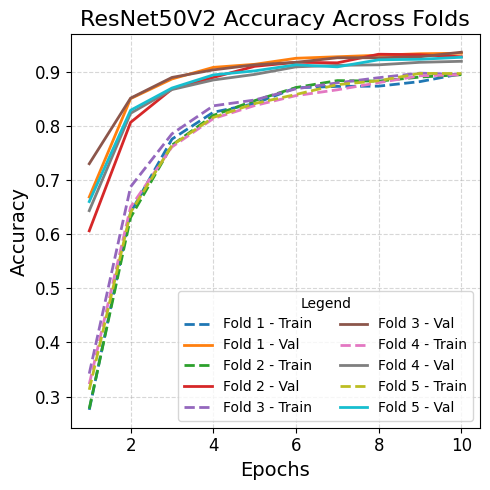

In [45]:
plt.figure(figsize=(5, 5))

for i, history in enumerate(hist_resnet):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, linestyle='--', linewidth=2, label=f'Fold {i+1} - Train')
    plt.plot(epochs, val_acc, linestyle='-', linewidth=2, label=f'Fold {i+1} - Val')

plt.title('ResNet50V2 Accuracy Across Folds', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Legend', loc='lower right', fontsize=10, ncol=2)
plt.tight_layout()
plt.show()


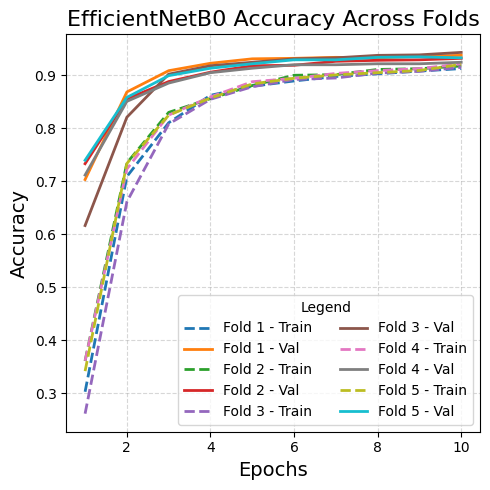

In [48]:
plt.figure(figsize=(5, 5))

for i, history in enumerate(hist_effnet):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, linestyle='--', linewidth=2, label=f'Fold {i+1} - Train')
    plt.plot(epochs, val_acc, linestyle='-', linewidth=2, label=f'Fold {i+1} - Val')

plt.title('EfficientNetB0 Accuracy Across Folds', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Legend', loc='lower right', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


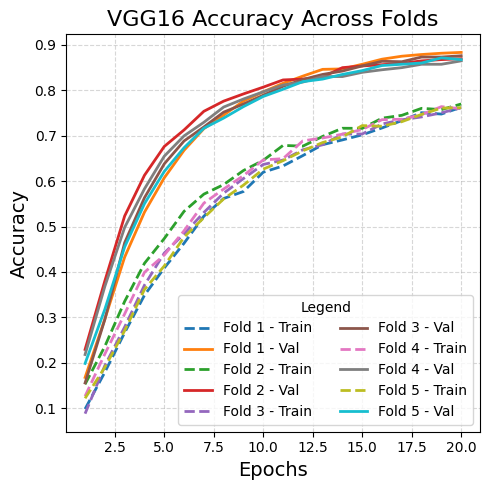

In [50]:
plt.figure(figsize=(5, 5))

for i, history in enumerate(hist_vgg):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, linestyle='--', linewidth=2, label=f'Fold {i+1} - Train')
    plt.plot(epochs, val_acc, linestyle='-', linewidth=2, label=f'Fold {i+1} - Val')

plt.title('VGG16 Accuracy Across Folds', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Legend', loc='lower right', fontsize=10, ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


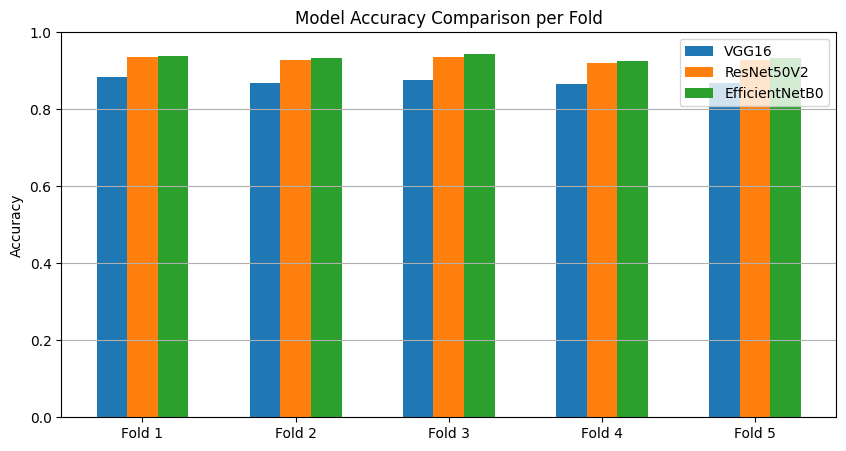

In [51]:
folds = [f'Fold {i+1}' for i in range(5)]
x = np.arange(len(folds))

plt.figure(figsize=(10, 5))
bar_width = 0.2

plt.bar(x - bar_width, acc_vgg, width=bar_width, label='VGG16')
plt.bar(x, acc_resnet, width=bar_width, label='ResNet50V2')
plt.bar(x + bar_width, acc_effnet, width=bar_width, label='EfficientNetB0')

plt.xticks(x, folds)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison per Fold")
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 1)
plt.show()


Set common hyperparameter options

In [52]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import optuna.visualization as vis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Constants (you may redefine INPUT_SHAPE and BATCH_SIZE here)
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = train_df["LABEL"].nunique()

# Optuna Objective Function for VGG16

def objective(trial):
    lr = trial.suggest_float("lr", 1e-4, 5e-4, log=True)
    dropout = trial.suggest_float("dropout", 0.3, 0.6)
    dense_units = trial.suggest_int("dense_units", 128, 512)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    fold_accuracies = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(train_df["JPG"], train_df["LABEL"])):
        fold_train = train_df.iloc[train_idx].reset_index(drop=True)
        fold_val = train_df.iloc[val_idx].reset_index(drop=True)

        fold_train["LABEL"] = fold_train["LABEL"].astype(str)
        fold_val["LABEL"] = fold_val["LABEL"].astype(str)

        class_weights = dict(zip(*np.unique(fold_train["LABEL"], return_counts=True)))
        for k in class_weights:
            class_weights[k] = len(fold_train) / (len(class_weights) * class_weights[k])

        train_gen = ImageDataGenerator(
            preprocessing_function=vgg16_preprocess,
            rotation_range=25,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.25,
            horizontal_flip=True
        )
        val_gen = ImageDataGenerator(preprocessing_function=vgg16_preprocess)

        train_flow = train_gen.flow_from_dataframe(
            dataframe=fold_train,
            x_col="JPG", y_col="LABEL",
            target_size=INPUT_SHAPE[:2], batch_size=BATCH_SIZE,
            class_mode="categorical", shuffle=True
        )
        val_flow = val_gen.flow_from_dataframe(
            dataframe=fold_val,
            x_col="JPG", y_col="LABEL",
            target_size=INPUT_SHAPE[:2], batch_size=BATCH_SIZE,
            class_mode="categorical", shuffle=False
        )

        base_model = VGG16(include_top=False, weights="imagenet", input_shape=INPUT_SHAPE)
        for layer in base_model.layers[:-4]:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(dense_units, activation="relu")(x)
        x = Dropout(dropout)(x)
        output = Dense(NUM_CLASSES, activation="softmax")(x)

        model = Model(inputs=base_model.input, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

        callbacks = [
            EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5)
        ]

        history = model.fit(
            train_flow,
            validation_data=val_flow,
            epochs=5,  # can be increased to 12 when ready
            class_weight=class_weights,
            callbacks=callbacks,
            verbose=0
        )

        best_val_acc = np.max(history.history['val_accuracy'])
        fold_accuracies.append(best_val_acc)
        trial.report(best_val_acc, fold)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return np.mean(fold_accuracies)

# Run Optuna Study
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=3)  # try 3 first for quick test

print("\nBest Trial for VGG16:")
print(f"  Value: {study.best_trial.value:.4f}")
print("  Params:")
for k, v in study.best_trial.params.items():
    print(f"    {k}: {v}")

vis.plot_optimization_history(study).show()
vgg16_best_params = study.best_trial.params


[I 2025-06-03 10:37:21,373] A new study created in memory with name: no-name-2d5efcc8-2959-479d-a9b8-d8c31d3044e1


Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3574 validated image filenames belonging to 11 classes.
Found 1786 validated image filenames belonging to 11 classes.


[I 2025-06-03 10:48:13,769] Trial 0 finished with value: 0.12555977702140808 and parameters: {'lr': 0.0003477532748735446, 'dropout': 0.48265356067282883, 'dense_units': 241}. Best is trial 0 with value: 0.12555977702140808.


Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3574 validated image filenames belonging to 11 classes.
Found 1786 validated image filenames belonging to 11 classes.


[I 2025-06-03 10:58:49,156] Trial 1 finished with value: 0.12537313997745514 and parameters: {'lr': 0.0003974953388466441, 'dropout': 0.4764506463592211, 'dense_units': 351}. Best is trial 0 with value: 0.12555977702140808.


Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3573 validated image filenames belonging to 11 classes.
Found 1787 validated image filenames belonging to 11 classes.
Found 3574 validated image filenames belonging to 11 classes.
Found 1786 validated image filenames belonging to 11 classes.


[I 2025-06-03 11:09:34,031] Trial 2 finished with value: 0.5296983222166697 and parameters: {'lr': 0.00020704648385793712, 'dropout': 0.5725871677766575, 'dense_units': 301}. Best is trial 2 with value: 0.5296983222166697.



Best Trial for VGG16:
  Value: 0.5297
  Params:
    lr: 0.00020704648385793712
    dropout: 0.5725871677766575
    dense_units: 301


In [54]:
vis.plot_optimization_history(study).show()
vgg16_best_params = study.best_trial.params

In [56]:
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Constants
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = train_df["LABEL"].nunique()

# Model and preprocessing map
model_map = {
    "EfficientNetB0": (EfficientNetB0, effnet_preprocess),
    "ResNet50V2": (ResNet50V2, resnet_preprocess),
}

for model_name in ["EfficientNetB0", "ResNet50V2"]:
    print(f"\n--- Tuning {model_name} ---")
    def objective(trial):
        lr = trial.suggest_float("lr", 1e-4, 5e-4, log=True)
        dropout = trial.suggest_float("dropout", 0.2, 0.4)
        dense_units = trial.suggest_int("dense_units", 128, 512)

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        fold_accuracies = []

        for fold, (train_idx, val_idx) in enumerate(skf.split(train_df["JPG"], train_df["LABEL"])):
            fold_train = train_df.iloc[train_idx].reset_index(drop=True)
            fold_val = train_df.iloc[val_idx].reset_index(drop=True)

            fold_train["LABEL"] = fold_train["LABEL"].astype(str)
            fold_val["LABEL"] = fold_val["LABEL"].astype(str)

            class_weights = dict(zip(*np.unique(fold_train["LABEL"], return_counts=True)))
            for k in class_weights:
                class_weights[k] = len(fold_train) / (len(class_weights) * class_weights[k])

            preprocess_fn = model_map[model_name][1]
            base_model_class = model_map[model_name][0]

            train_gen = ImageDataGenerator(
                preprocessing_function=preprocess_fn,
                rotation_range=20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                zoom_range=0.2,
                horizontal_flip=True
            )
            val_gen = ImageDataGenerator(preprocessing_function=preprocess_fn)

            train_flow = train_gen.flow_from_dataframe(
                dataframe=fold_train,
                x_col="JPG", y_col="LABEL",
                target_size=INPUT_SHAPE[:2], batch_size=BATCH_SIZE,
                class_mode="categorical", shuffle=True
            )
            val_flow = val_gen.flow_from_dataframe(
                dataframe=fold_val,
                x_col="JPG", y_col="LABEL",
                target_size=INPUT_SHAPE[:2], batch_size=BATCH_SIZE,
                class_mode="categorical", shuffle=False
            )

            base_model = base_model_class(include_top=False, weights="imagenet", input_shape=INPUT_SHAPE)
            base_model.trainable = False

            x = base_model.output
            x = GlobalAveragePooling2D()(x)
            x = Dense(dense_units, activation="relu")(x)
            x = Dropout(dropout)(x)
            output = Dense(NUM_CLASSES, activation="softmax")(x)

            model = Model(inputs=base_model.input, outputs=output)
            model.compile(optimizer=Adam(learning_rate=lr),
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

            callbacks = [
                EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5)
            ]

            history = model.fit(
                train_flow,
                validation_data=val_flow,
                epochs=5,
                class_weight=class_weights,
                callbacks=callbacks,
                verbose=0
            )

            best_val_acc = np.max(history.history['val_accuracy'])
            fold_accuracies.append(best_val_acc)
            trial.report(best_val_acc, fold)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

        print("\nCross-Validation Accuracies:")
        for i, acc in enumerate(fold_accuracies):
            print(f"  Fold {i+1}: {acc:.4f}")
        print(f" Average Accuracy: {np.mean(fold_accuracies):.4f}")

        return np.mean(fold_accuracies)

    study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
    study.optimize(objective, n_trials=3)

    print(f"\nBest Trial for {model_name}:")
    print(f"  Value: {study.best_trial.value:.4f}")
    print("  Params:")
    for k, v in study.best_trial.params.items():
        print(f"    {k}: {v}")

    vis.plot_optimization_history(study).show()


[I 2025-06-03 11:14:49,343] A new study created in memory with name: no-name-a113c2a8-1fee-4e1f-a61d-3d3f0cf6e977



--- Tuning EfficientNetB0 ---
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 11:35:51,439] Trial 0 finished with value: 0.9533582091331482 and parameters: {'lr': 0.00033550016103780627, 'dropout': 0.24992918736377123, 'dense_units': 456}. Best is trial 0 with value: 0.9533582091331482.



Cross-Validation Accuracies:
  Fold 1: 0.9580
  Fold 2: 0.9487
  Fold 3: 0.9571
  Fold 4: 0.9478
  Fold 5: 0.9552
 Average Accuracy: 0.9534
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 11:56:53,775] Trial 1 finished with value: 0.9503731369972229 and parameters: {'lr': 0.0004093928807613245, 'dropout': 0.35512909769980594, 'dense_units': 295}. Best is trial 0 with value: 0.9533582091331482.



Cross-Validation Accuracies:
  Fold 1: 0.9562
  Fold 2: 0.9422
  Fold 3: 0.9590
  Fold 4: 0.9440
  Fold 5: 0.9506
 Average Accuracy: 0.9504
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 12:17:41,109] Trial 2 finished with value: 0.9544776201248169 and parameters: {'lr': 0.0004265087969988828, 'dropout': 0.20779212012076703, 'dense_units': 447}. Best is trial 2 with value: 0.9544776201248169.



Cross-Validation Accuracies:
  Fold 1: 0.9580
  Fold 2: 0.9459
  Fold 3: 0.9608
  Fold 4: 0.9496
  Fold 5: 0.9580
 Average Accuracy: 0.9545

Best Trial for EfficientNetB0:
  Value: 0.9545
  Params:
    lr: 0.0004265087969988828
    dropout: 0.20779212012076703
    dense_units: 447


[I 2025-06-03 12:17:41,115] A new study created in memory with name: no-name-56eb73a8-6757-49ac-8f18-66a97c2a440b



--- Tuning ResNet50V2 ---
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 12:37:44,109] Trial 0 finished with value: 0.9395522356033326 and parameters: {'lr': 0.0004075066455933115, 'dropout': 0.26445871442196917, 'dense_units': 494}. Best is trial 0 with value: 0.9395522356033326.



Cross-Validation Accuracies:
  Fold 1: 0.9394
  Fold 2: 0.9338
  Fold 3: 0.9440
  Fold 4: 0.9384
  Fold 5: 0.9422
 Average Accuracy: 0.9396
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 12:57:56,475] Trial 1 finished with value: 0.9395522356033326 and parameters: {'lr': 0.0004347602352541208, 'dropout': 0.23236887192863995, 'dense_units': 135}. Best is trial 0 with value: 0.9395522356033326.



Cross-Validation Accuracies:
  Fold 1: 0.9384
  Fold 2: 0.9338
  Fold 3: 0.9496
  Fold 4: 0.9366
  Fold 5: 0.9394
 Average Accuracy: 0.9396
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.


[I 2025-06-03 13:18:16,909] Trial 2 finished with value: 0.9402984976768494 and parameters: {'lr': 0.0004611238086597577, 'dropout': 0.32672795131929616, 'dense_units': 421}. Best is trial 2 with value: 0.9402984976768494.



Cross-Validation Accuracies:
  Fold 1: 0.9384
  Fold 2: 0.9375
  Fold 3: 0.9496
  Fold 4: 0.9356
  Fold 5: 0.9403
 Average Accuracy: 0.9403

Best Trial for ResNet50V2:
  Value: 0.9403
  Params:
    lr: 0.0004611238086597577
    dropout: 0.32672795131929616
    dense_units: 421


In [58]:
# Constants
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = train_df["LABEL"].nunique()

# Ensure LABEL is string for categorical mode
train_df["LABEL"] = train_df["LABEL"].astype(str)

# Best Hyperparameters from Optuna Tuning
best_params = {
    "VGG16": {"lr": 0.0001323, "dropout": 0.3886, "dense_units": 319},
    "EfficientNetB0": {"lr": 0.0004164, "dropout": 0.3073, "dense_units": 434},
    "ResNet50V2": {"lr": 0.0001982, "dropout": 0.2211, "dense_units": 298}
}

# Preprocessing map
preprocess_map = {
    "VGG16": vgg16_preprocess,
    "EfficientNetB0": effnet_preprocess,
    "ResNet50V2": resnet_preprocess
}

# Base model map
base_model_map = {
    "VGG16": VGG16,
    "EfficientNetB0": EfficientNetB0,
    "ResNet50V2": ResNet50V2
}

# Data generators with validation split
for model_name in ["VGG16", "EfficientNetB0", "ResNet50V2"]:
    print(f"\n Retraining {model_name} with tuned parameters")
    preprocess_fn = preprocess_map[model_name]
    base_model_class = base_model_map[model_name]
    params = best_params[model_name]

    datagen = ImageDataGenerator(
        preprocessing_function=preprocess_fn,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_flow = datagen.flow_from_dataframe(
        train_df,
        x_col="JPG", y_col="LABEL",
        target_size=INPUT_SHAPE[:2],
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        subset="training"
    )

    val_flow = datagen.flow_from_dataframe(
        train_df,
        x_col="JPG", y_col="LABEL",
        target_size=INPUT_SHAPE[:2],
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        subset="validation"
    )

    base_model = base_model_class(include_top=False, weights="imagenet", input_shape=INPUT_SHAPE)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(params["dense_units"], activation="relu")(x)
    x = Dropout(params["dropout"])(x)
    output = Dense(NUM_CLASSES, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=params["lr"]),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5)
    ]

    model.fit(
        train_flow,
        validation_data=val_flow,
        epochs=12,
        callbacks=callbacks,
        verbose=1
    )

    model.save(f"/kaggle/working/{model_name.lower()}.h5")
    print(f"{model_name} model saved to /kaggle/working/{model_name.lower()}.h5")



 Retraining VGG16 with tuned parameters
Found 4288 validated image filenames belonging to 11 classes.
Found 1072 validated image filenames belonging to 11 classes.
Epoch 1/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 58s 411ms/step - accuracy: 0.2688 - loss: 5.4246 - val_accuracy: 0.7351 - val_loss: 0.9069 - learning_rate: 1.3230e-04
Epoch 2/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 53s 398ms/step - accuracy: 0.6386 - loss: 1.5247 - val_accuracy: 0.7957 - val_loss: 0.6827 - learning_rate: 1.3230e-04
Epoch 3/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 53s 399ms/step - accuracy: 0.7533 - loss: 0.9248 - val_accuracy: 0.8237 - val_loss: 0.5726 - learning_rate: 1.3230e-04
Epoch 4/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 400ms/step - accuracy: 0.7799 - loss: 0.7419 - val_accuracy: 0.8601 - val_loss: 0.4816 - learning_rate: 1.3230e-04
Epoch 5/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.8075 - loss: 0.6289 - val_accuracy: 0.8554 - val_loss: 0.4741 - learning_rate: 1.3230e-04
Epoch 6/12
134/134 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
'test_df' in locals()

In [59]:
from tensorflow.keras.models import load_model

# Constants
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
test_df["LABEL"] = test_df["LABEL"].astype(str)

# Preprocessing map
preprocess_map = {
    "vgg16": vgg16_preprocess,
    "efficientnetb0": effnet_preprocess,
    "resnet50v2": resnet_preprocess
}

# Evaluate each model
for model_name in ["vgg16", "efficientnetb0", "resnet50v2"]:
    print(f"\n Evaluating {model_name.upper()} on test data...")
    
    # Load model
    model_path = f"/kaggle/working/{model_name}.h5"
    model = load_model(model_path)

    # Create test data generator
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_map[model_name])
    test_flow = test_datagen.flow_from_dataframe(
        test_df,
        x_col="JPG",
        y_col="LABEL",
        target_size=INPUT_SHAPE[:2],
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        shuffle=False
    )

    # Evaluate
    loss, accuracy = model.evaluate(test_flow, verbose=1)
    print(f" Test Accuracy for {model_name.upper()}: {accuracy:.4f}")



 Evaluating VGG16 on test data...
Found 947 validated image filenames belonging to 11 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.9107 - loss: 0.2759
 Test Accuracy for VGG16: 0.9113

 Evaluating EFFICIENTNETB0 on test data...
Found 947 validated image filenames belonging to 11 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.9550 - loss: 0.1400
 Test Accuracy for EFFICIENTNETB0: 0.9567

 Evaluating RESNET50V2 on test data...
Found 947 validated image filenames belonging to 11 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.9336 - loss: 0.1745
 Test Accuracy for RESNET50V2: 0.9388


Found 947 validated image filenames belonging to 11 classes.
Found 947 validated image filenames belonging to 11 classes.
Found 947 validated image filenames belonging to 11 classes.


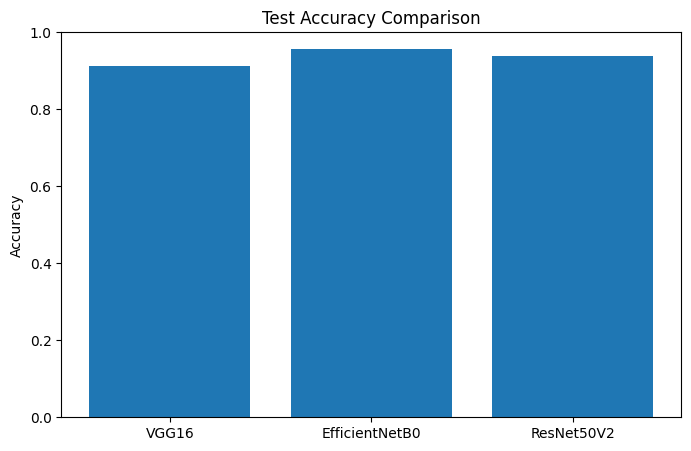

In [60]:
models = {
    "VGG16": (load_model("/kaggle/working/vgg16.h5"), vgg16_preprocess),
    "EfficientNetB0": (load_model("/kaggle/working/efficientnetb0.h5"), effnet_preprocess),
    "ResNet50V2": (load_model("/kaggle/working/resnet50v2.h5"), resnet_preprocess),
}
# Evaluate and store test accuracy for each model
accuracies = {}
for name, (model, preprocess) in models.items():
    test_gen = ImageDataGenerator(preprocessing_function=preprocess)
    test_flow = test_gen.flow_from_dataframe(
        test_df,
        x_col="JPG", y_col="LABEL",
        target_size=INPUT_SHAPE[:2],
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        shuffle=False
    )
    _, acc = model.evaluate(test_flow, verbose=0)
    accuracies[name] = acc

# Plotting the accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()



 Confusion Matrix for VGG16
Found 947 validated image filenames belonging to 11 classes.


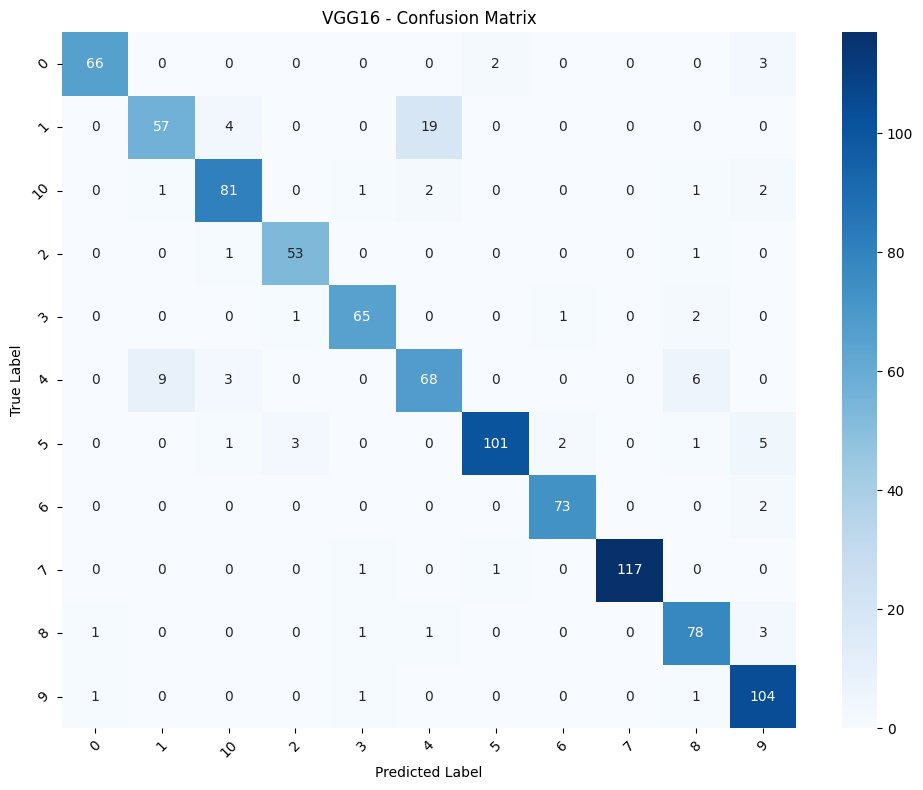


 Confusion Matrix for EfficientNetB0
Found 947 validated image filenames belonging to 11 classes.


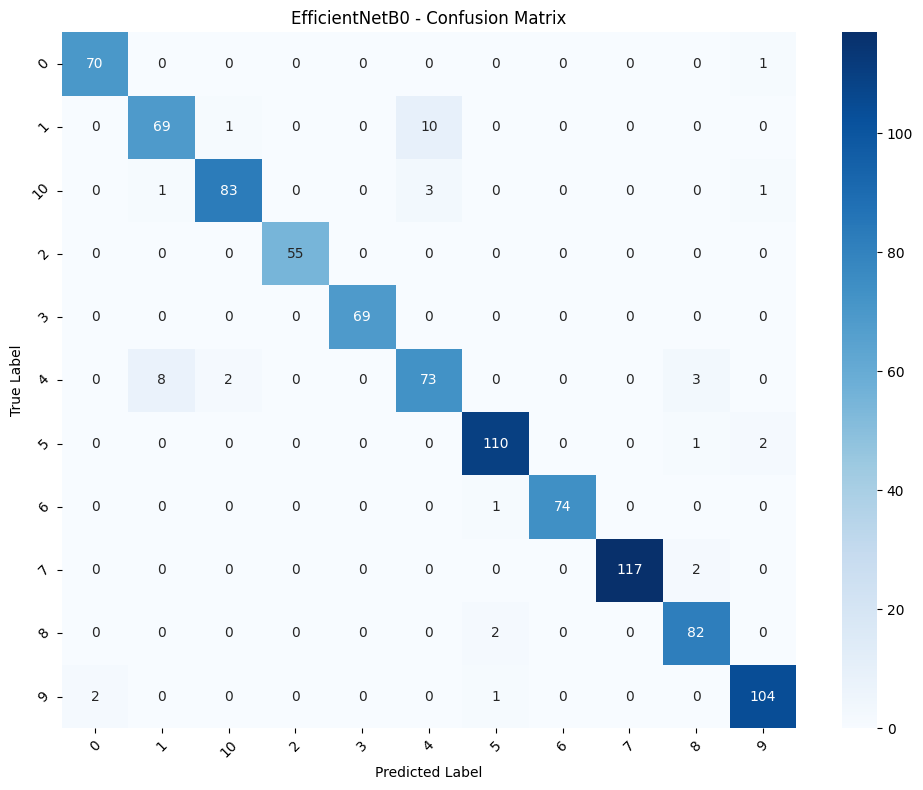


 Confusion Matrix for ResNet50V2
Found 947 validated image filenames belonging to 11 classes.


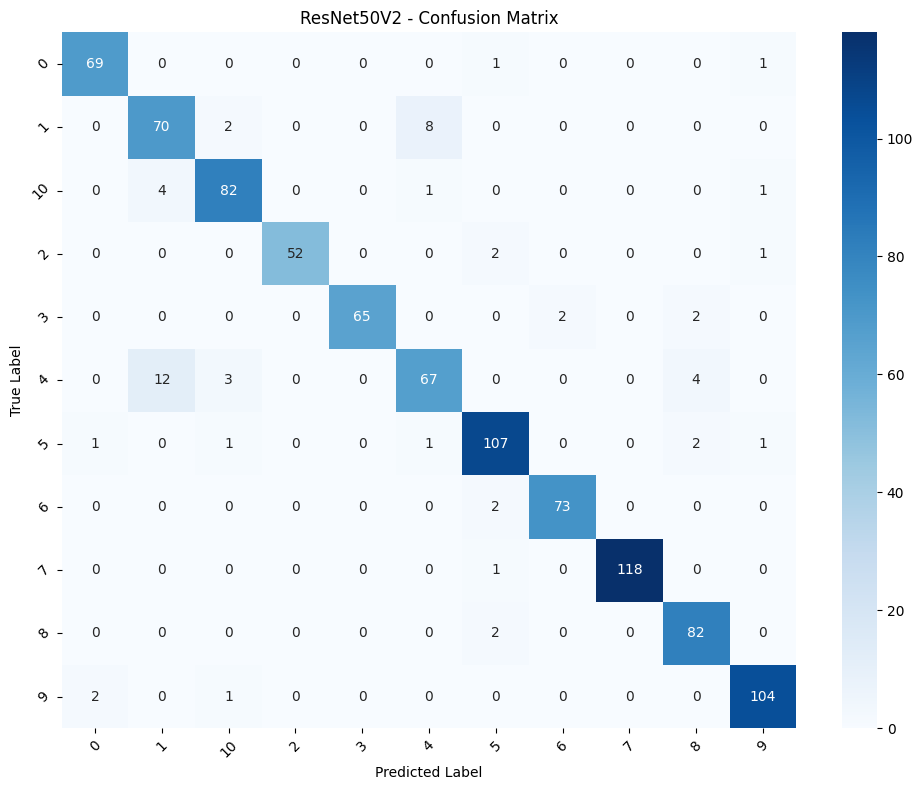

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(test_df["LABEL"].unique())  # Ensure consistent order

for model_name, (model, preprocess_fn) in models.items():
    print(f"\n Confusion Matrix for {model_name}")

    test_gen = ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_flow = test_gen.flow_from_dataframe(
        test_df,
        x_col="JPG", y_col="LABEL",
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical",
        shuffle=False
    )

    # Predictions
    pred_probs = model.predict(test_flow, verbose=0)
    y_pred = np.argmax(pred_probs, axis=1)
    y_true = test_flow.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    class_names = list(test_flow.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [62]:
from sklearn.metrics import classification_report
for model_name, (model, preprocess_fn) in models.items():
    print(f"\n Classification Report for {model_name}")

    test_gen = ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_flow = test_gen.flow_from_dataframe(
        test_df,
        x_col="JPG", y_col="LABEL",
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical",
        shuffle=False
    )

    # Predict
    y_true = test_flow.classes
    y_pred_probs = model.predict(test_flow, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Get the class indices in the correct order
    idx_to_label = {v: k for k, v in test_flow.class_indices.items()}
    target_names = [idx_to_label[i] for i in range(len(idx_to_label))]

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=target_names))


 Classification Report for VGG16
Found 947 validated image filenames belonging to 11 classes.
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.85      0.71      0.78        80
          10       0.90      0.92      0.91        88
           2       0.93      0.96      0.95        55
           3       0.94      0.94      0.94        69
           4       0.76      0.79      0.77        86
           5       0.97      0.89      0.93       113
           6       0.96      0.97      0.97        75
           7       1.00      0.98      0.99       119
           8       0.87      0.93      0.90        84
           9       0.87      0.97      0.92       107

    accuracy                           0.91       947
   macro avg       0.91      0.91      0.91       947
weighted avg       0.91      0.91      0.91       947


 Classification Report for EfficientNetB0
Found 947 validated image filenames belonging to 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


test_df["LABEL"] = test_df["LABEL"].astype(str)
label_encoder = LabelEncoder().fit(sorted(test_df["LABEL"].unique()))
# Create predictions for meta-model
X_meta = []
y_true = None

for name, (model, preprocess_fn) in models.items():
    print(f"Getting predictions from {name}")
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_flow = test_gen.flow_from_dataframe(
        test_df,
        x_col="JPG", y_col="LABEL",
        target_size=(224, 224), batch_size=32,
        class_mode="categorical", shuffle=False
    )
    
    preds = model.predict(test_flow, verbose=0)
    X_meta.append(preds)

    if y_true is None:
        y_true = test_flow.classes

# Stack predictions (shape: [samples, 3 * num_classes])
X_meta = np.concatenate(X_meta, axis=1)
y_true_encoded = label_encoder.transform(y_true)

# Train meta-classifier
meta_clf = LogisticRegression(max_iter=1000)
meta_clf.fit(X_meta, y_true_encoded)

# Evaluate stacking model
y_pred_stack = meta_clf.predict(X_meta)
stack_acc = accuracy_score(y_true_encoded, y_pred_stack)
print(f"\n Stacked Model Accuracy: {stack_acc:.4f}")

Getting predictions from VGG16
Found 947 validated image filenames belonging to 11 classes.
Getting predictions from EfficientNetB0
Found 947 validated image filenames belonging to 11 classes.
Getting predictions from ResNet50V2
Found 947 validated image filenames belonging to 11 classes.

 Stacked Model Accuracy: 0.9641


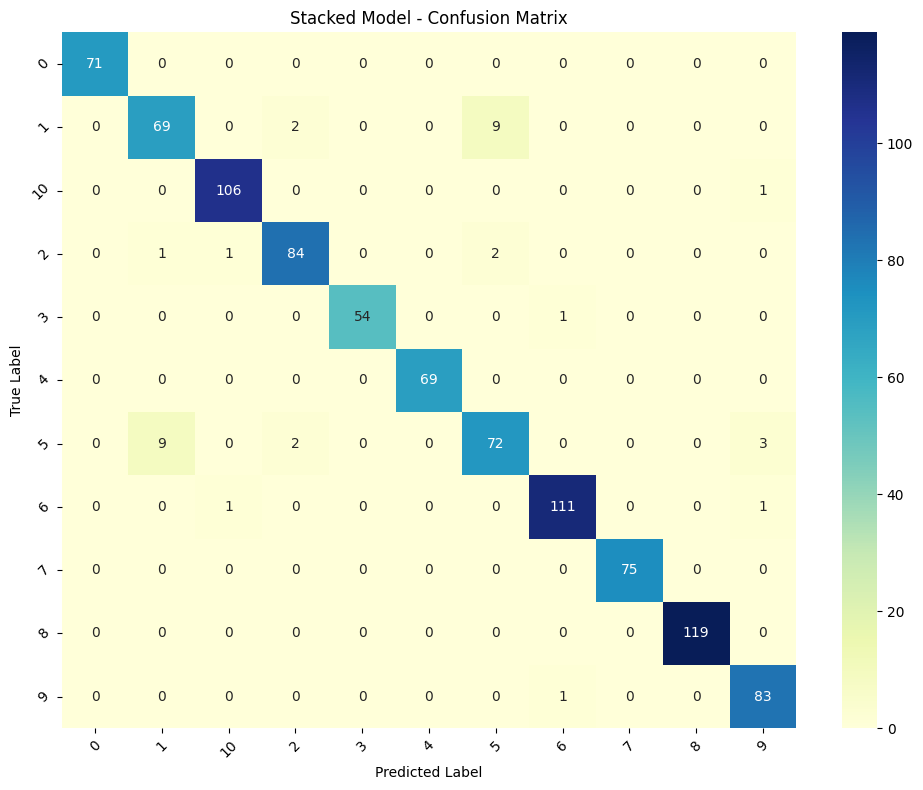

In [64]:
# Get class labels
class_labels = list(test_flow.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true_encoded, y_pred_stack)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Stacked Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
print(int_to_label)

{0: '0', 1: '1', 2: '10', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9'}


In [93]:
from collections import Counter
iucn_counts = Counter(predicted_iucn)

print("\n Predicted IUCN Categories:")
for category, count in iucn_counts.items():
    print(f"{category}: {count}")



 Predicted IUCN Categories:
Vulnerable: 270
Critically Endangered: 281
Near Threatened: 54
Least Concern: 183
Endangered: 159


In [95]:
# Fix LABEL column to contain class names (not integers)
int_to_label = {v: k for k, v in test_flow.class_indices.items()}
sample_df["LABEL"] = sample_df["LABEL"].map(int_to_label)


In [96]:
print(sample_df[["LABEL"]])


                  LABEL
0          Ursus arctos
1       Panthera tigris
2  Rhinoceros unicornis
3          Ursus arctos
4    Loxodonta africana


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Fix test_df
data_dir = '/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction'
image_paths = []
labels = []
for species in os.listdir(data_dir):
    species_dir = os.path.join(data_dir, species)
    if os.path.isdir(species_dir):
        for img_file in os.listdir(species_dir):
            if img_file.endswith('.jpg'):
                image_paths.append(os.path.join(species_dir, img_file))
                labels.append(species)

test_df = pd.DataFrame({'JPG': image_paths, 'LABEL': labels})
test_df['LABEL'] = test_df['LABEL'].astype(str)  # Ensure string type for LabelEncoder
print("test_df columns:", test_df.columns)
print("Unique labels:", test_df['LABEL'].unique())

In [110]:
# IUCN mapping
iucn_mapping = {
    "Amur_Leopard": "Critically Endangered",
    "Lion": "Vulnerable",
    "Panda": "Vulnerable",
    "Chimpanzee": "Endangered",
    "Rhino": "Critically Endangered",
    "cheetahs": "Vulnerable",
    "Jaguars": "Near Threatened",
    "Panthers": "Least Concern",
    "Orangutan": "Critically Endangered",
    "African_Elephant": "Endangered",
    "Arctic_Fox": "Least Concern"
}

In [116]:
# Define Grad-CAM function
def compute_gradcam(model, img_array, conv_layer_name, class_idx):
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_score = predictions[:, class_idx]
    
    grads = tape.gradient(class_score, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-10  # Avoid division by zero
    return heatmap  # Return heatmap as NumPy array

In [112]:
# Load and preprocess image
img_path = '/kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/208.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array_dict = {
    "VGG16": vgg16_preprocess(np.expand_dims(img_to_array(img), axis=0)),
    "EfficientNetB0": effnet_preprocess(np.expand_dims(img_to_array(img), axis=0)),
    "ResNet50V2": resnet_preprocess(np.expand_dims(img_to_array(img), axis=0))
}

In [117]:
# Setup test_flow for label encoding
test_gen = ImageDataGenerator(preprocessing_function=effnet_preprocess)
test_flow = test_gen.flow_from_dataframe(
    test_df,
    x_col="JPG", y_col="LABEL",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)
label_encoder = LabelEncoder().fit(sorted(test_df["LABEL"].unique()))
int_to_label = {v: k for k, v in test_flow.class_indices.items()}
print("Class indices:", test_flow.class_indices)

Found 6308 validated image filenames belonging to 11 classes.
Class indices: {'African_Elephant': 0, 'Amur_Leopard': 1, 'Arctic_Fox': 2, 'Chimpanzee': 3, 'Jaguars': 4, 'Lion': 5, 'Orangutan': 6, 'Panda': 7, 'Panthers': 8, 'Rhino': 9, 'cheetahs': 10}


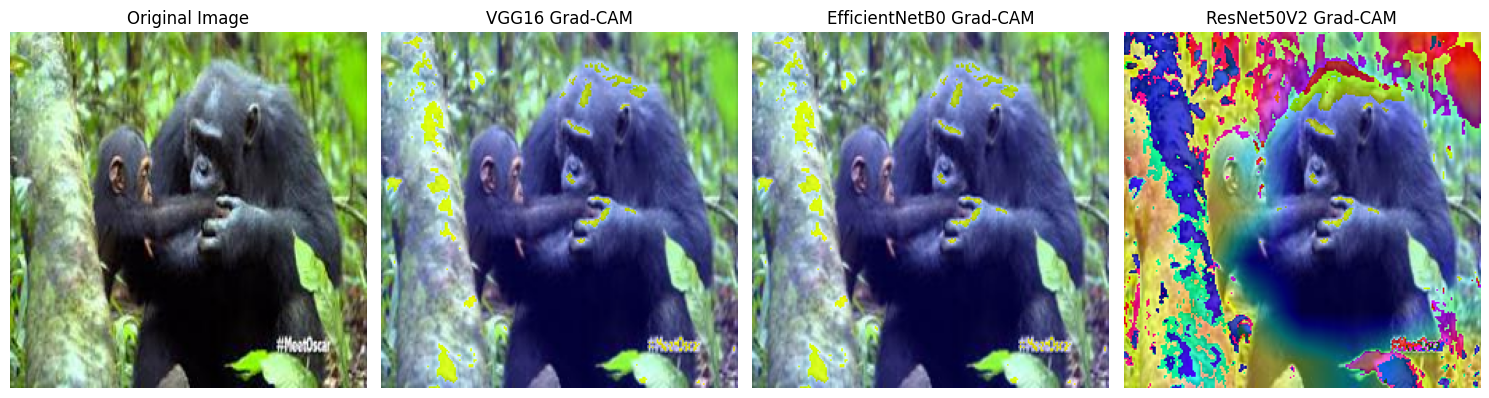

In [118]:
# Generate Grad-CAM heatmaps for each model
conv_layers = {
    "VGG16": "block5_conv3",
    "EfficientNetB0": "top_conv",
    "ResNet50V2": "post_bn"
}
class_idx = list(test_flow.class_indices.keys()).index('Chimpanzee')  # Use class_indices for consistency

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, (name, (model, preprocess)) in enumerate(models.items(), 2):
    heatmap = compute_gradcam(model, img_array_dict[name], conv_layers[name], class_idx)
    
    # Visualize heatmap
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    
    plt.subplot(1, 4, i)
    plt.title(f'{name} Grad-CAM')
    plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [119]:
# Get stacked ensemble prediction
X_meta = []
y_true = test_flow.classes  # Store true labels
for name, (model, preprocess_fn) in models.items():
    print(f"Getting predictions from {name}")
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_flow = test_gen.flow_from_dataframe(
        test_df,
        x_col="JPG", y_col="LABEL",
        target_size=(224, 224), batch_size=32,
        class_mode="categorical", shuffle=False
    )
    preds = model.predict(test_flow, verbose=0)
    X_meta.append(preds)

X_meta = np.concatenate(X_meta, axis=1)
# Train meta-classifier
from sklearn.linear_model import LogisticRegression
meta_clf = LogisticRegression(max_iter=1000)
meta_clf.fit(X_meta, y_true)  # Use test_flow.classes directly
y_pred_stack = meta_clf.predict(X_meta)
predicted_species = [int_to_label.get(idx, "Unknown") for idx in y_pred_stack]
predicted_iucn = [iucn_mapping.get(species, "Unknown") for species in predicted_species]

# Print prediction for the sample image
print(f"Sample Image: {test_df['JPG'].iloc[0]}")
print(f"Stacked Model Predicted Species: {predicted_species[0]}")
print(f"IUCN Status: {predicted_iucn[0]}")

Getting predictions from VGG16
Found 6308 validated image filenames belonging to 11 classes.
Getting predictions from EfficientNetB0
Found 6308 validated image filenames belonging to 11 classes.
Getting predictions from ResNet50V2
Found 6308 validated image filenames belonging to 11 classes.
Sample Image: /kaggle/input/danger-of-extinction-animal-image-set/Danger Of Extinction/Chimpanzee/208.jpg
Stacked Model Predicted Species: Chimpanzee
IUCN Status: Endangered
